All this stuff comes from a Jupyter notebook from Mining the Social Web 2nd Edition, speicfiically the chapter on Facebook:

http://nbviewer.jupyter.org/github/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/ipynb/Chapter%202%20-%20Mining%20Facebook.ipynb

Get access token and explore the Graph API here:  https://developers.facebook.com/tools/explorer/

In [3]:
# Even though it expires, best not to save the token here...
ACCESS_TOKEN = 'EAACEdEose0cBAAEP721Hobnxm2H0u4QvEH0cebeFxnLUO8djFFMyxgZCwYZBWWJChACxcEoHa0WMeoFUZBFpAUo6wCElZANZBZADZBtsAwKMTdtnmwpxMvWqLyZAdJp70zEtZCZBfQ2M2ZB2121TezQlmAZBZB8AwLoZAzFZCRnxYiGAog2VgZDZD'

import facebook
import json

# Create a connection to the Graph API with the access token
g = facebook.GraphAPI(ACCESS_TOKEN, version='2.7')


In [7]:
# pretty print json
def pp(data):
    print(json.dumps(data, indent=1))

In [8]:
import requests
import json

base_url = 'https://graph.facebook.com/me'

# Get 10 likes for 10 friends
fields = 'id,name,friends.limit(10).fields(likes.limit(10))'

url = '{base_url}?fields={fields}&access_token={token}'.format(base_url=base_url, 
                                                                fields=fields, token=ACCESS_TOKEN)

print(url)

# Interpret the response as JSON and convert back
# to Python data structures
content = requests.get(url).json()

# Pretty-print the JSON and display it
pp(content)


https://graph.facebook.com/me?fields=id,name,friends.limit(10).fields(likes.limit(10))&access_token=EAACEdEose0cBAMTu9LG0DTDcfZA2KHwl8FOzCRki1Rakz527gjZACQ9wAWkkDkFQhXPEh7Bflz4alHf2hR6bDQpZC4rvkUf8Op2scRpCRFsTbLWkXhQQ1nWq5T4EG2b2mCC1iFitKp4iqF3pneaOrltRUeWX1bUc635sRs2EgZDZD
{
 "friends": {
  "paging": {
   "cursors": {
    "before": "QVFIUlR2cXE4TEhldkh0RWZAfc3JZAcUdnZAFpicy1kMUoyWlA4MENzaW0xRnlaUTA3ZA2ZAYUmhHWDRIMVhMUnA1TUdTaFoZD",
    "after": "QVFIUmlfVFY3VENwaHRVbGV2ZAHdobFNWWjNXdGtKSVB1T01Obk1iY1gwcXFLeV9jWHR0SUd0TGdJdGNxVVNBQnhEcWRtbzdOUllDdmh0SE1hUU91ZA2FSM3hB"
   }
  },
  "data": [
   {
    "id": "3703917"
   },
   {
    "id": "520715821"
   },
   {
    "id": "10200268192542749"
   },
   {
    "id": "931326570219784"
   }
  ],
  "summary": {
   "total_count": 537
  }
 },
 "id": "10100361105413688",
 "name": "Cristina Luis"
}


In [9]:
import facebook # pip install facebook-sdk
import json

# Create a connection to the Graph API with your access token

g = facebook.GraphAPI(ACCESS_TOKEN, version='2.7')

In [19]:
# Get an instance of Mining the Social Web
# Using the page name also works if you know it.
# e.g. 'MiningTheSocialWeb' or 'CrossFit'
mtsw_id = '146803958708175'
bymus_id = 'BymuseetOslo'
pp(g.get_object(bymus_id))


{
 "parking": {
  "lot": 0,
  "valet": 0,
  "street": 1
 },
 "phone": "23 28 41 70",
 "id": "183343891697105",
 "likes": 43186,
 "about": "Bymuseet \u2013 med hjerte for Oslo. ",
 "public_transit": "Til Bymuseet: Trikk 12 og buss 20 til Frogner Plass. (Evn. banen til Majorstuen + 10 minutters gange)\n\nTil Interkulturelt museum: Alle baner til Gr\u00f8nland. Buss 37 til T\u00f8yenbekken",
 "description": "Bymuseet og Teatermuseet holder til p\u00e5 Frogner, Interkulturelt Museum p\u00e5 Gr\u00f8nland og Arbeidermuseet p\u00e5 Sagene.",
 "cover": {
  "offset_x": 0,
  "source": "https://scontent.xx.fbcdn.net/v/t1.0-9/s720x720/13413723_1183120888386062_4590855582694521366_n.jpg?oh=00adac0ada55c28524d138e060116aa2&oe=587A6A9F",
  "cover_id": "1183120888386062",
  "id": "1183120888386062",
  "offset_y": 0
 },
 "location": {
  "city": "Oslo",
  "zip": "0266",
  "longitude": 10.70703,
  "country": "Norway",
  "latitude": 59.92491,
  "street": "Frognerveien 67"
 },
 "category": "Museum/Art Gal

In [21]:
fields = 'posts.limit(5)'
bymus_id = 'BymuseetOslo'
pp(g.get_object(bymus_id, fields))

TypeError: get_object() takes 2 positional arguments but 3 were given

In [29]:
g.get_connections(bymus_id, 'posts', limit=3, fields='comments{from}, likes')

{'data': [{'id': '183343891697105_1268906583140825',
   'likes': {'data': [{'id': '10151973105345882',
      'name': 'Henning Gabrielsen'},
     {'id': '682504611832844', 'name': 'Ylva Amalie Hagen'}],
    'paging': {'cursors': {'after': 'NjgyNTA0NjExODMyODQ0',
      'before': 'MTAxNTE5NzMxMDUzNDU4ODIZD'}}}},
  {'comments': {'data': [{'from': {'id': '688817961263764',
       'name': 'Eva Johansen'},
      'id': '1267848383246645_1268681179830032'},
     {'from': {'id': '10200514378778639', 'name': 'Petter Lerdahl'},
      'id': '1267848383246645_1268699099828240'},
     {'from': {'id': '10153364888778626', 'name': 'Sidsel I. Tønnessen'},
      'id': '1267848383246645_1268668489831301'},
     {'from': {'id': '1137613202922531', 'name': 'Bodil Weng'},
      'id': '1267848383246645_1268662226498594'},
     {'from': {'id': '10205062765666670', 'name': 'Finn Kampestuen-Berntzen'},
      'id': '1267848383246645_1268685466496270'},
     {'from': {'id': '213319785754786', 'name': 'Ove Brandt'}

In [5]:
import requests
import networkx as nx

# For limit number of posts, get likes and comments with author (from) and likes
posts = g.get_connections("BymuseetOslo", 'posts', limit=30, fields='comments.limit(30){from, likes.limit(50)}, likes.limit(10)')

# Get some more:
url = posts['paging']['next']
# Filter out any posts that don't have any comments (sad!)
posts = [post for post in posts['data'] if post.get('comments') is not None]

#while url:
for i in range(5):
    res = requests.get(url).json()
    url = res['paging'].get('next')
    data = [post for post in res['data'] if post.get('comments') is not None]
    posts.append(data)

len(posts)

31

In [9]:
comment = posts[0]['comments']['data'][0]
comment['from']['name']
comment.get('likes')
print(comment)

{'from': {'name': 'Eva Johansen', 'id': '688817961263764'}, 'id': '1267848383246645_1268681179830032', 'likes': {'paging': {'cursors': {'after': 'OTExNjA3OTgyMTk3NzM1', 'before': 'NjM4NDczMTc2Mjk3MDYx'}}, 'data': [{'name': 'Torunn Meyer Kleven', 'id': '638473176297061'}, {'name': 'Liv Grande', 'id': '1509590175986747'}, {'name': 'Alfred Blakstad', 'id': '813550152001016'}, {'name': 'Eve Dallas', 'id': '317809635082679'}, {'name': 'MayBente Lie', 'id': '10151963530007257'}, {'name': 'Kari Wally Enger', 'id': '10203355223072486'}, {'name': 'Hans-Jacob Schultz', 'id': '10205174544077569'}, {'name': 'Bjørn Roger Syversen', 'id': '768808869840553'}, {'name': 'Morten Netteland', 'id': '911607982197735'}]}}


In [30]:
# Build a graph from the posts (commenter, liker)
nxg = nx.Graph()
for post in posts[0:26]:
    commentlikers = [(comment['from']['name'], comment.get('likes')) 
                     for comment in post['comments']['data']]
    [nxg.add_edge(comment[0], liker['name']) 
      for comment in commentlikers if comment[1] is not None
        for liker in comment[1].get('data') ]

In [31]:
nxg.edges()

[('Kari Haukaas', 'Einar Sørlie'),
 ('Kari Haukaas', 'Betty Kristiansen'),
 ('Per Gøran Erichsen', 'Terje Kristensen'),
 ('Bettina Bækkevold', 'Bymuseet'),
 ('Bettina Bækkevold', 'Geir Arveng'),
 ('André Hefferli', 'Agnes Radich'),
 ('Lasse Bjølgerud', 'Odd Olsen'),
 ('Martin Skaug Halsos', 'Atle P. Gundersen'),
 ('Roger Johan Moen', 'Laila Belle'),
 ('Roger Johan Moen', 'Helge Norvalls'),
 ('Solveig Hagen', 'Bjørn Tore Cohn'),
 ('Elin K. Stensrud', 'Irene Hagen'),
 ('Øivind Aamodt', 'Randi Brændeland'),
 ('Øivind Aamodt', 'Tycho D. Castberg'),
 ('Borghild Solberg', 'Bibi Løhren'),
 ('Anne Berghøi', 'Ingeborg Heiestad'),
 ('May-Sylvi Nilsen', 'Finn Kampestuen-Berntzen'),
 ('May-Sylvi Nilsen', 'Bymuseet'),
 ('Else Bratne', 'Tom Nilsson'),
 ('Else Bratne', 'Bodil Müller'),
 ('Else Bratne', 'Erik Ødegaard'),
 ('Else Bratne', 'Betty Kristiansen'),
 ('Else Bratne', 'Dagfinn Hauge'),
 ('Else Bratne', 'Klara Hansen'),
 ('Else Bratne', 'Randi Brændeland'),
 ('Else Bratne', 'Kristian Frederik B

In [32]:
from collections import Counter
Counter(elem for elem in nxg.edges())


Counter({("'Lena Ulriksen", 'Finn Kampestuen-Berntzen'): 1,
         ('Aase Gunn Nohr', 'Anita Vasstveit'): 1,
         ('Aase Gunn Nohr', 'Elisabeth Sarafina Nohr'): 1,
         ('Aase Lindam Sveen', 'Anne Elisabeth Holmen'): 1,
         ('Alfred Blakstad', 'Betty Kristiansen'): 1,
         ('Alfred Blakstad', 'Dagfinn Hauge'): 1,
         ('Alfred Blakstad', 'Eigil Olsen'): 1,
         ('Alfred Blakstad', 'Eva Johansen'): 1,
         ('Alfred Blakstad', 'Ingeborg Heiestad'): 1,
         ('Alfred Blakstad', 'Irene Hagen'): 1,
         ('Alfred Blakstad', 'Tor Erik Häll'): 1,
         ('Anders Rudi Jansen', 'Erik Asker'): 1,
         ('Andreas Wrangell', 'Finn Kampestuen-Berntzen'): 1,
         ('Andreas Wrangell', 'Helene Moe Slinning'): 1,
         ('Andres Gonzalez Roli', 'Finn Kampestuen-Berntzen'): 1,
         ('André Hefferli', 'Agnes Radich'): 1,
         ('Anita K. Stenersen', 'Eigil Olsen'): 1,
         ('Anita K. Stenersen', 'Irene Hagen'): 1,
         ('Anita Kolloen', 'Terj

In [36]:
cliques = [c for c in nx.find_cliques(nxg)]
cliques

[['Lasse Bjølgerud', 'Odd Olsen'],
 ['Roger Johan Moen', 'Laila Belle'],
 ['Roger Johan Moen', 'Helge Norvalls'],
 ['Øivind Aamodt', 'Randi Brændeland'],
 ['Øivind Aamodt', 'Tycho D. Castberg'],
 ['Anders Rudi Jansen', 'Erik Asker'],
 ['Randi Grimsen', 'Siri Arnesen'],
 ['Randi Grimsen', 'Gunnar Gundersen'],
 ['Randi Grimsen', 'Bente Buranello'],
 ['Randi Grimsen', 'Heidi Brander'],
 ['Randi Grimsen', 'Rune Gjøvaag'],
 ['Bjørn Tore Cohn', 'Solveig Hagen'],
 ['Lisbeth Heitmann', 'Bymuseet'],
 ['Mie Mortensen', 'Irene Hagen'],
 ['Mie Mortensen', 'Knut Bydal'],
 ['Iren Pribanic', 'Bente Buranello'],
 ['Iren Pribanic', 'Turid Andersson Bogstad'],
 ['Veronica Amalie Rusdal', 'Turid Andersen'],
 ['Liv Grande', 'Anne Berg Siegel'],
 ['Liv Grande', 'Roger Fjeldheim', 'Helge Norvalls'],
 ['Liv Grande', 'Kristian Frederik Brandt'],
 ['Liv Grande', 'Terje Kristensen', 'Helge Norvalls'],
 ['Liv Grande', 'Terje Kristensen', 'Eva Johansen'],
 ['Mai-Lis Lefin', 'Bymuseet', 'Klara Hansen'],
 ['Mai-Lis

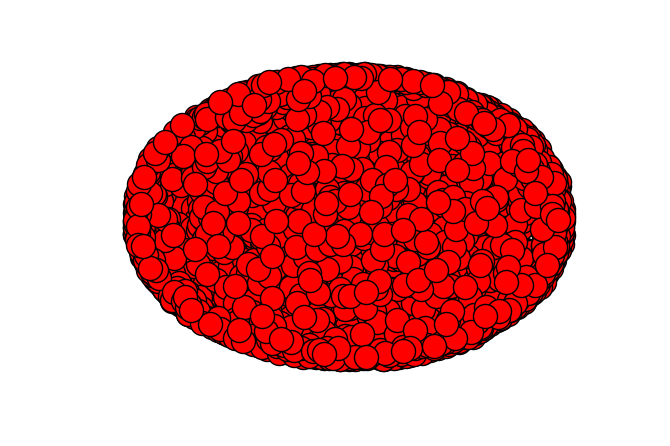

In [44]:
import matplotlib.pyplot as plt
nx.draw(nxg)
plt.show()

In [46]:
coloring = nx.greedy_color(nxg)
coloring

{"'Lena Ulriksen": 0,
 'Aase Gunn Nohr': 0,
 'Aase Lindam Sveen': 0,
 'Agnes Radich': 1,
 'Agustin Villalpando': 1,
 'Aina Jovic Skogstad': 0,
 'Alfred Blakstad': 2,
 'Anders M. Mamen': 1,
 'Anders Rudi Jansen': 1,
 'Andre Heier': 1,
 'Andreas Wrangell': 0,
 'Andres Gonzalez Roli': 0,
 'André Hefferli': 0,
 'Anita K. Stenersen': 1,
 'Anita Kolloen': 1,
 'Anita Vasstveit': 1,
 'Anna Marie Frost': 0,
 'Anne Aubert': 0,
 'Anne Berg Siegel': 0,
 'Anne Berghøi': 1,
 'Anne Berit Nesne': 1,
 'Anne Elisabeth Holmen': 1,
 'Anne Grete Huken Raad': 2,
 'Anne Grete Nordrum': 0,
 'Anne M. Ulven': 1,
 'Anne Marie Billington': 2,
 'Anne Marie Lindblad Jensen': 1,
 'Anne Marie Müller': 0,
 'Anne Marit Waaler Solberg': 2,
 'Anne Mitsem Borgersen': 0,
 'Anne Nordahl': 1,
 'Anne Sofie Sanden': 0,
 'Anne-Karine Tohje': 2,
 'Anne-Marie Øverland': 1,
 'Anne-grethe Skott': 0,
 'Anya K. Kristensen': 0,
 'Arild Avnsjø': 2,
 'Arild Johan Myrberg': 0,
 'Arild Moe': 2,
 'Arild Østberg': 1,
 'Arne Arnesen': 2,
 'A

In [48]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)

json.dump(nld, open('viz/force.json','w'))

In [49]:
from IPython.display import IFrame
from IPython.core.display import display

# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.

viz_file = 'files/viz/force.html'

display(IFrame(viz_file, '100%', '600px'))
